In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

In [2]:
data = datasets.load_digits()
n = len(data.images)
n

1797

In [3]:
data.images.shape # 1797张照片8*8

(1797, 8, 8)

In [4]:
#数据扁平化
image_data = data.images.reshape((n,-1)) # n个图片，
image_data.shape

(1797, 64)

In [5]:
image_data[:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [6]:
labels= data.target # 目标变量
labels

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
#选择一个PCA，至少能解释80%原来的方差
pca = PCA(n_components=0.8)
pca_images = pca.fit_transform(image_data) #64-13
pca.explained_variance_ratio_
#pca.explained_variance_ratio_[:3].sum()

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [8]:
pca.explained_variance_ratio_[:13].sum() # 80%左右

0.8028957761040318

In [9]:
pca_images.shape # 从64维降到13维

(1797, 13)

In [10]:
# A * A.T 手工做特征值特征向量，就是奇异值
m = np.asmatrix(image_data)
lam,v = np.linalg.eig(m * m.transpose()) # 特征值
lam2,v2 = np.linalg.eig(m.transpose() * m)
U,sig,V = np.linalg.svd(m) # 奇异值分解

#image_data.shape,lam.shape,v.shape, lam2.shape,v2.shape

In [11]:
image_data.shape,lam.shape,v.shape, lam2.shape,v2.shape,U.shape,sig.shape,V.shape

((1797, 64),
 (1797,),
 (1797, 1797),
 (64,),
 (64, 64),
 (1797, 1797),
 (64,),
 (64, 64))

In [12]:
import math
lam[:5],lam2[:5],sig[:5], np.isclose([math.sqrt(lam2[0])],[sig[0]]) # 特征值的平方根就是奇异值

(array([4809772.4255891 +0.j,  321485.33927159+0.j,  293769.34713479+0.j,
         254168.93409356+0.j,  181129.37208299+0.j]),
 array([4809772.4255891 ,  321485.33927159,  293769.34713479,
         254168.93409356,  181129.37208299]),
 array([2193.11933683,  566.99677184,  542.00493276,  504.1516975 ,
         425.59296526]),
 array([ True]))

In [13]:
lam2_sqrt = np.array([math.sqrt(i) for i in lam2])
sum(lam),sum(lam2),sum(sig),np.isclose(lam2_sqrt[:10],sig[:10]),lam2_sqrt.max()/sum(sig) # 如何确定PCA 100%？

((6907012.000000002+0j),
 6907012.000000004,
 10133.262029460571,
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 0.2164277732537185)

In [14]:
# 结果可视化
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D绘图
%matplotlib notebook

Text(0.5, 0, 'pca 3')

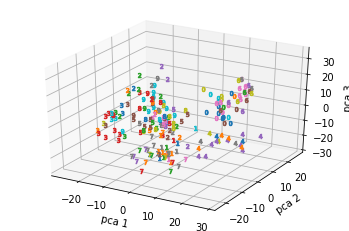

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(200):
    ax.scatter(pca_images[i,0],pca_images[i,1],pca_images[i,2], marker=r'${}$'.format(labels[i],s=64))
ax.set_xlabel("pca 1")
ax.set_ylabel("pca 2")
ax.set_zlabel("pca 3")

In [16]:
# 去中心化
from sklearn.preprocessing import minmax_scale
images = minmax_scale(image_data)

In [17]:
images.shape,image_data[0].min(),image_data[100].max(),max(image_data.ravel()),image_data.ravel().shape,image_data.shape

((1797, 64), 0.0, 16.0, 16.0, (115008,), (1797, 64))

In [18]:
images[:1],images[0].max()

(array([[0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
         0.0625    , 0.        , 0.        , 0.        , 0.        ,
         0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
         0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
         0.        , 0.6875    , 0.5       , 0.        , 0.        ,
         0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
         0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
         0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
         0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
         0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
         0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
         0.        , 0.        , 0.        , 0.375     , 0.8125    ,
         0.625     , 0.        , 0.        , 0.        ]]), 0.9375)

In [19]:
# k均值
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [20]:
n_data=1000
seed=1
n_clusters=4

In [21]:
blobs,blob_labels = make_blobs(n_samples=n_data,n_features=2,centers=n_clusters,random_state=seed)
clusters_blob=KMeans(n_clusters=n_clusters,random_state=seed).fit_predict(blobs)

In [22]:
clusters_blob[:10],blobs[:10],blobs.shape

(array([2, 1, 0, 3, 1, 3, 3, 3, 0, 2]), array([[-10.45765533,  -3.30899488],
        [ -5.90962043,  -7.80717036],
        [ -1.00497975,   4.35530142],
        [ -6.63784922,  -4.52085249],
        [ -6.3466658 ,  -8.89940182],
        [ -4.67047183,  -3.35527602],
        [ -5.62742066,  -1.70195987],
        [ -6.91064247,  -2.83731201],
        [ -1.76490462,   5.03668554],
        [ -8.70416288,  -4.39234621]]), (1000, 2))

In [23]:
# 随机均匀分布
uniform=np.random.rand(n_data,2)
cluster_uniform=KMeans(n_clusters=n_clusters,random_state=seed).fit_predict(uniform)

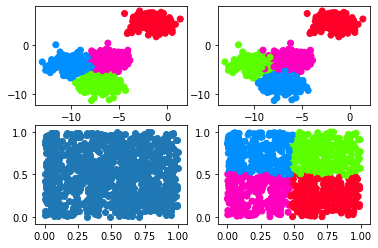

In [24]:
fig = plt.figure()
plt.subplot(221) # 2行2列图1
plt.scatter(blobs[:,0], blobs[:,1], c=clusters_blob, cmap='gist_rainbow')
#plt.axes=off
plt.subplot(222)
plt.scatter(blobs[:,0], blobs[:,1], c=blob_labels, cmap='gist_rainbow')
plt.subplot(223)
plt.scatter(uniform[:,0],uniform[:,1])
plt.subplot(224)
plt.scatter(uniform[:,0],uniform[:,1], c= cluster_uniform, cmap='gist_rainbow')

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold,datasets # 流形


In [26]:
# 产生带有噪音的瑞士卷数据集
X,color = datasets.samples_generator.make_swiss_roll(n_samples=3000)
clusters_swiss = KMeans(n_clusters=200,random_state=123).fit_predict(X) # 100个分类

In [27]:
clusters_swiss.shape,clusters_swiss[:10]

((3000,), array([180, 163, 114, 185,  92,  28, 194,  52,  63,  41]))

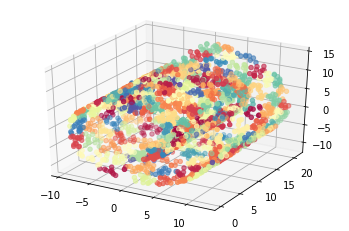

In [28]:
fig2 = plt.figure()
ax = fig2.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2], c=clusters_swiss, cmap='Spectral')

In [29]:
XX,color = datasets.samples_generator.make_swiss_roll(n_samples=3000)
clusters_swiss2 = KMeans(n_clusters=200,random_state=123).fit(XX) # 200个中心点，fit后结果可以可以找到中心位置


In [30]:
XX.shape,clusters_swiss2.cluster_centers_.shape,clusters_swiss2.cluster_centers_[:2]# 

((3000, 3), (200, 3), array([[ 6.04788451, 17.15022834,  2.86238477],
        [ 5.58569582,  6.14998389, -1.89796728]]))

In [117]:
#使用目标提示和不使用目标提示
import numpy as np
from scipy.spatial import Voronoi,voronoi_plot_2d
from sklearn.datasets import make_moons

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeansFeaturizer as kmf
#from sklearn.cluster import KMeansFeaturizer

train,lables = make_moons(n_samples=2000,noise=0.2)
kmf_hint = kmf(k=100,target_scale=10).fit(train,labels) # fit产生100个簇中心的位置
kmf_no_hint = kmf(k=100,target_scale=0).fit(train,lables) # target_scale=0, 相当于没有添加目标到特征中


In [120]:
kmf_hint.cluster_centers_.shape # 产生的中心点

(100, 2)

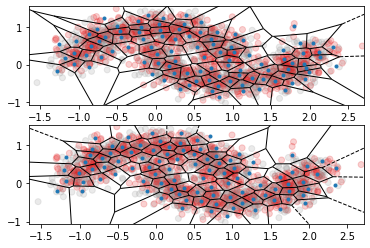

In [119]:
def kmeans_voronio_plot(X,y,cluster_centers,ax):
    ax.scatter(X[:,0],X[:,1],c=y, cmap='Set1',alpha=0.2)
    vor = Voronoi(cluster_centers)
    voronoi_plot_2d(vor,ax=ax,show_vertices=False,alpha=0.5)

fig,(ax1,ax2) = plt.subplots(2,1)
kmeans_voronio_plot(train,labels, kmf_hint.cluster_centers_, ax1)
kmeans_voronio_plot(train,labels, kmf_no_hint.cluster_centers_, ax2)

In [97]:
# 多模型融合分类
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.svm import SVC # 支持向量机
from sklearn.neighbors import KNeighborsClassifier # K最近邻
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # 组合，随机森林，梯度提升

In [98]:
# 生成与训练数据相同的分布一些测试数据
test_X,test_y = make_moons(n_samples=2000,noise=0.3)
test_X.shape,test_y.shape,test_y[:10]
#使用kmeans特征生成器生成特征簇
train_cluster = kmf_hint.transform(train) # transofrm预知分类
test_cluster = kmf_hint.transform(test_X)
# 特征分类器构建的特征构造新的输入特征


In [99]:
train.shape, kmf_hint.cluster_centers_.shape, train_cluster.shape, test_cluster.shape, train_cluster[:10],type(train)

((2000, 2), (100, 2), (2000, 1), (2000, 1), array([[43],
        [64],
        [50],
        [28],
        [53],
        [36],
        [ 0],
        [53],
        [ 6],
        [83]]), numpy.ndarray)

In [100]:
import scipy
from sys import getsizeof

#train_w_cluster = scipy.sparse.hstack((train, train_cluster))
#test_w_cluster =  scipy.sparse.hstack((test_X, test_cluster))

train_w_cluster = np.hstack((train, train_cluster))
test_w_cluster =  np.hstack((test_X, test_cluster))

train_w_cluster2 = scipy.sparse.coo_matrix(train_w_cluster)

getsizeof(train_w_cluster), getsizeof(train_w_cluster2) # 稀疏矩阵48k压缩到56b

(48112, 56)

In [101]:
train.shape,train_cluster.shape,type(train),type(train_cluster)

((2000, 2), (2000, 1), numpy.ndarray, numpy.ndarray)

In [102]:
# 特征分类器构建的特征构造新的输入特征
lr_cluster = LogisticRegression().fit(train_w_cluster, labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [104]:
classifier_names= ['LR', 'rbf-svm', 'KNN', 'dt', 'RF', 'BoostedTrees']
classifiers = [LogisticRegression(random_state=123), SVC(gamma=2,C=1), KNeighborsClassifier(5),
             DecisionTreeClassifier(), RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1),
             GradientBoostingClassifier(max_depth=5,n_estimators=10,learning_rate=1.0)]

In [89]:
from sklearn.metrics import roc_curve,auc

for model in classifiers:
    model.fit(train ,labels) #train, train_w_cluster,原训练数据，添加了中心作为特征的的训练数据

# ROC评价分类器性能
def test_roc(model,test_X,test_y):
    if hasattr(model, "_decision_function"):
        preds = model.decision_function(test_X) # lr,svm基于线性计算的，有decision_function,其他没有
    else:
        preds = model.predict_proba(test_X)[:,1] # 概率，
    fpr,tpr,_ = roc_curve(test_y, preds) # 真，预测, ROC曲线是改变分类决策边界时tpr和fpr之间的权衡
    score = auc(fpr,tpr)
    return fpr,tpr,score # 假正率，真正率

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR w/ cluster AUC: 0.932593
{'LR': 0.9333589999999999, 'rbf-svm': 0.95946, 'KNN': 0.942455, 'dt': 0.8980000000000001, 'RF': 0.961566, 'BoostedTrees': 0.9562585}


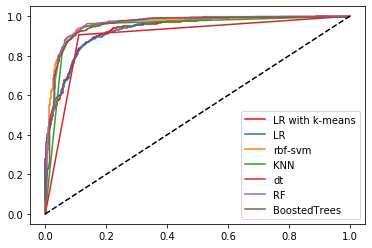

In [95]:
#可视化
import matplotlib.pyplot as plt
plt.figure()
fpr_cluster,tpr_cluster,score = test_roc(lr_cluster,test_w_cluster,test_y)
plt.plot(fpr_cluster,tpr_cluster,'r-',label='LR with k-means')
print("LR w/ cluster AUC: %f" %score)

scores = {}
for i,model in enumerate(classifiers):
    fpr,tpr,score = test_roc(model,test_X,test_y)
    plt.plot(fpr,tpr, label=classifier_names[i])
    
    scores[classifier_names[i]]=score

plt.plot([0,1],[0,1],'k--') # 对角虚线
plt.legend()
print(scores)